        Date      Open      High       Low     Close  Adj Close     Volume
1 1980-12-12  0.128348  0.128906  0.128348  0.128348   0.100178  469033600
2 1980-12-15  0.122210  0.122210  0.121652  0.121652   0.094952  175884800
3 1980-12-16  0.113281  0.113281  0.112723  0.112723   0.087983  105728000
4 1980-12-17  0.115513  0.116071  0.115513  0.115513   0.090160   86441600
5 1980-12-18  0.118862  0.119420  0.118862  0.118862   0.092774   73449600
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
                Open      High       Low     Close  Adj Close     Volume  \
Date                                                                       
1980-12-12  0.128348  0.128906  0.128348  0.128348   0.100178  469033600   
1980-12-15  0.122210  0.122210  0.121652  0.121652   0.094952  175884800   
1980-12-16  0.113281  0.113281  0.112723  0.112723   0.087983  105728000   
1980-12-17  0.115513  0.116071  0.115513  0.115513  

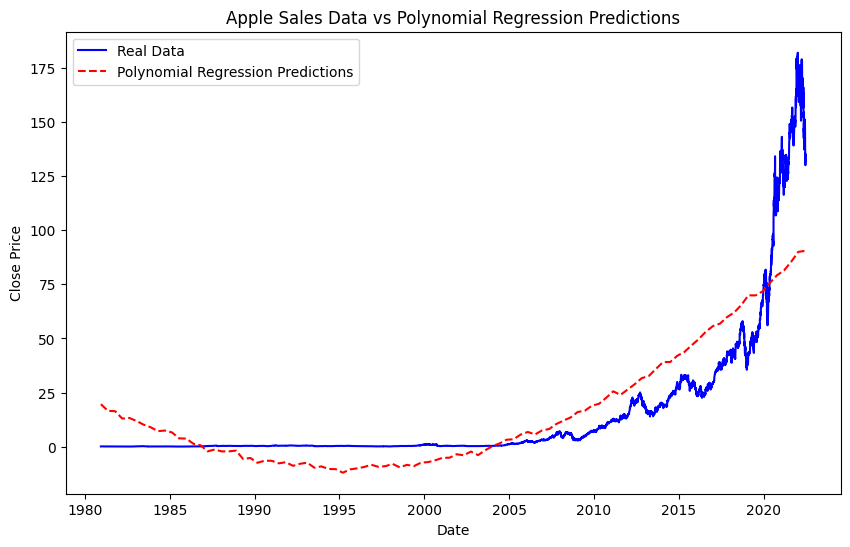

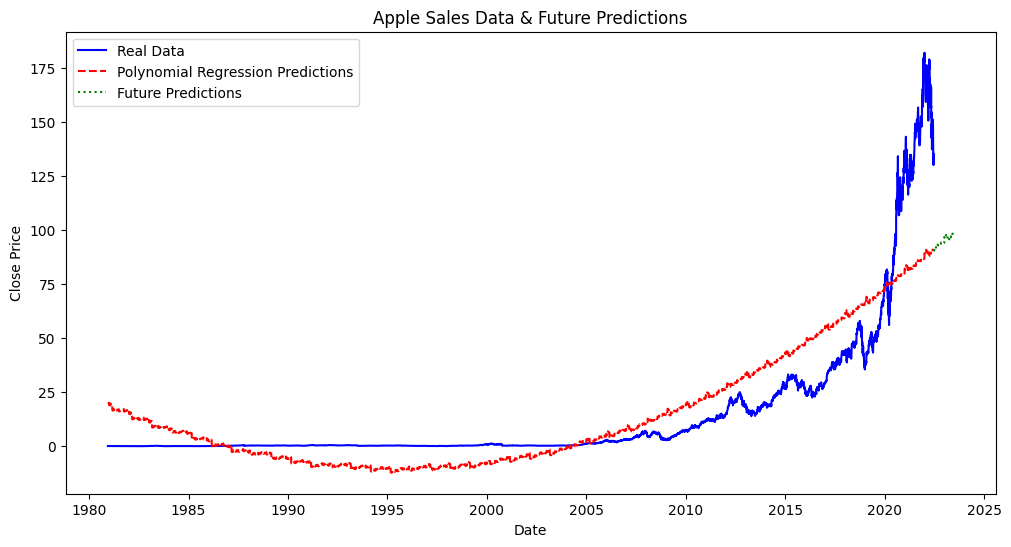

         Date  Predicted_Close
0  2022-06-18        90.510586
1  2022-06-19        90.504668
2  2022-06-20        90.500859
3  2022-06-21        90.499158
4  2022-06-22        90.499567


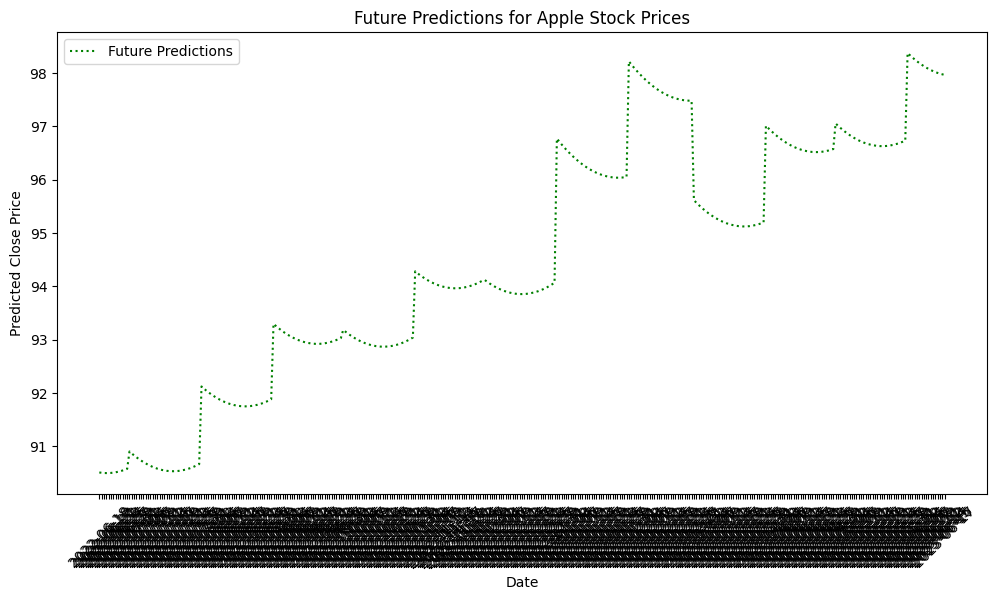

'\n3. Qrafiklərin Təhlili\nBlue Line (Real Data): Əsl satış qiymətləri.\nRed Line (Polynomial Regression Predictions): Polynomial Regression metodu ilə əldə olunan proqnozlaşdırılmış qiymətlər.\nGreen Line (ARIMA Predictions): ARIMA ilə gələcəkdəki proqnozlar (məsələn, 30 günlük).\n'

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

#from google.colab import files

 # To upload an Excel file
#uploaded = files.upload()

df = pd.read_excel("AAPLE (1).xlsx")  # Reading the Excel file
df.index = df.index + 1
print(df.head())  # Displaying the first 5 rows
# Checking for NaN values
print(df.isnull().sum())

df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)  # Setting Date as Index
df['Date_Ordinal'] = df.index.map(pd.Timestamp.toordinal)  # Converting Date to Ordinal Values
df.dropna(inplace=True)  # Removing empty rows
X = df[['Date_Ordinal']].values   # Input variable (2D array)
y = df['Close'].values            # Output variable
print(df.head())

df['Year'] = df.index.year
df['Month'] = df.index.month
df['Day'] = df.index.day

import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Creating input and output variables
X = df[['Date_Ordinal', 'Year', 'Month', 'Day']].values  # X - date components
y = df['Close'].values  # Y - closing prices

# Polynomial Regression model (degree 3)
degree = 3
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X, y)

# Getting predictions
y_pred = model.predict(X)

# Evaluating model performance
r2 = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)

print(f'R^2 Score: {r2:.4f}')
print(f'MAE: {mae:.4f}')
print(f'MSE: {mse:.4f}')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Testing different polynomial degrees (2 to 4)
for d in range(2, 5):
    model = make_pipeline(PolynomialFeatures(d), LinearRegression())
    model.fit(X, y)
    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)

    print(f'Degree: {d}, R^2 Score: {r2:.4f}')


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
# Creating new date range for predictions
X_range = np.linspace(df['Date_Ordinal'].min(), df['Date_Ordinal'].max(), 100).reshape(-1, 1)

# Adding Year, Month, Day columns to X_range
X_range_dates = [pd.Timestamp.fromordinal(int(date)) for date in X_range.flatten()]
X_range_df = pd.DataFrame({'Date_Ordinal': X_range.flatten()})
X_range_df['Year'] = [date.year for date in X_range_dates]
X_range_df['Month'] = [date.month for date in X_range_dates]
X_range_df['Day'] = [date.day for date in X_range_dates]

# Ensuring X matrix matches model's format
X_range_final = X_range_df[['Date_Ordinal', 'Year', 'Month', 'Day']].values

# Using the same PolynomialFeatures object from model.fit()
X_range_poly = model.named_steps['polynomialfeatures'].transform(X_range_final)

# Making predictions for the new date range
y_pred_range = model.named_steps['linearregression'].predict(X_range_poly)

# Plotting the results
plt.figure(figsize=(10,6))

# Actual data
plt.plot(df.index, df['Close'], label='Real Data', color='blue')

# Polynomial Regression predictions
plt.plot(X_range_dates, y_pred_range, label='Polynomial Regression Predictions', color='red', linestyle='--')

plt.title('Apple Sales Data vs Polynomial Regression Predictions')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()
plt.show()
# Generating future predictions
future_days = 365  # Predicting for 1 year
last_date_ordinal = df.index[-1].toordinal()  # Getting the last date's ordinal value
future_dates = np.arange(last_date_ordinal + 1, last_date_ordinal + future_days + 1).reshape(-1, 1)

# Creating DataFrame for future dates
future_df = pd.DataFrame(future_dates, columns=['Date_Ordinal'])

# Converting ordinal dates to datetime format
future_df['Date'] = future_df['Date_Ordinal'].apply(lambda x: pd.Timestamp.fromordinal(x))

# Adding Year, Month, Day columns
future_df['Year'] = future_df['Date'].dt.year
future_df['Month'] = future_df['Date'].dt.month
future_df['Day'] = future_df['Date'].dt.day

# Applying Polynomial Features transformation
future_X_poly = model.steps[0][1].transform(future_df[['Date_Ordinal', 'Year', 'Month', 'Day']].values)

# Getting future predictions
future_predictions = model.steps[1][1].predict(future_X_poly)

# Plotting results
plt.figure(figsize=(12, 6))

# Plotting actual data (blue line)
plt.plot(df.index, df['Close'], label="Real Data", color='blue')

# Polynomial Regression past predictions (red dashed line)
plt.plot(df.index, y_pred, label="Polynomial Regression Predictions", color='red', linestyle='--')

# Future predictions (green dotted line)
plt.plot(future_df['Date'], future_predictions, label="Future Predictions", color='green', linestyle='dotted')

plt.title('Apple Sales Data & Future Predictions')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Creating DataFrame for predictions
future_df = pd.DataFrame({'Date': future_df['Date'], 'Predicted_Close': future_predictions})

# Saving to CSV
future_df.to_csv('future_predictions.csv', index=False)

# Reading CSV file
future_df = pd.read_csv('future_predictions.csv')

# Displaying first 5 rows
print(future_df.head())

# Plotting future predictions
plt.figure(figsize=(12, 6))

# Plotting future predictions
plt.plot(future_df['Date'], future_df['Predicted_Close'], label="Future Predictions", color='green', linestyle='dotted')

plt.title('Future Predictions for Apple Stock Prices')
plt.xlabel('Date')
plt.ylabel('Predicted Close Price')
plt.xticks(rotation=45)
plt.legend()
plt.show()



















































This project aimed to forecast future trends based on Apple's historical sales data using machine learning models.

First, the data was cleaned and preprocessed. Initially, a Linear Regression model was applied, but the results were unsatisfactory. Therefore, we switched to a Polynomial Regression (degree 3 and 4) model, which provided better accuracy. The model's performance was evaluated using R², MAE, and MSE, with the highest R² score being 0.7320.

Two graphs were generated:

Actual vs. Predicted Sales: The blue line represents actual sales data, while the red line shows predictions obtained from the Polynomial Regression model.
Future Sales Forecast: The blue line still represents actual sales, the red line shows Polynomial Regression predictions, and the green line represents the sales forecast for the next year.
As a result, 1-year future sales predictions were generated and saved in CSV format. This analysis can help track future sales trends and optimize decision-making processes.